# Исследование рынка заведений общественного питания Москвы

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных,-предобработка" data-toc-modified-id="Загрузка-данных,-предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных, предобработка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор-датасета" data-toc-modified-id="Загрузка-и-обзор-датасета-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и обзор датасета</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Проверка-числовых-значений-на-аномалии" data-toc-modified-id="Проверка-числовых-значений-на-аномалии-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка числовых значений на аномалии</a></span></li><li><span><a href="#Промежуточный-вывод-по-шагу" data-toc-modified-id="Промежуточный-вывод-по-шагу-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Промежуточный вывод по шагу</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Виды-заведений-общественного-питания" data-toc-modified-id="Виды-заведений-общественного-питания-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Виды заведений общественного питания</a></span></li><li><span><a href="#Сетевые-и-несетевые-заведения" data-toc-modified-id="Сетевые-и-несетевые-заведения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сетевые и несетевые заведения</a></span></li><li><span><a href="#Виды-сетевых-заведений" data-toc-modified-id="Виды-сетевых-заведений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Виды сетевых заведений</a></span></li><li><span><a href="#Характеристики-сетевых-заведений" data-toc-modified-id="Характеристики-сетевых-заведений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Характеристики сетевых заведений</a></span></li><li><span><a href="#Средняя-вместимость-по-видам-заведений" data-toc-modified-id="Средняя-вместимость-по-видам-заведений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Средняя вместимость по видам заведений</a></span></li><li><span><a href="#Топ-10-улиц-Москвы-по-количеству-заведений-общественного-питания" data-toc-modified-id="Топ-10-улиц-Москвы-по-количеству-заведений-общественного-питания-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Топ-10 улиц Москвы по количеству заведений общественного питания</a></span></li><li><span><a href="#Улицы-с-одним-объектом-общественного-питания" data-toc-modified-id="Улицы-с-одним-объектом-общественного-питания-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Улицы с одним объектом общественного питания</a></span></li><li><span><a href="#Промежуточный-вывод-по-шагу" data-toc-modified-id="Промежуточный-вывод-по-шагу-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Промежуточный вывод по шагу</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# убрать предупреждения Pandas
import warnings
warnings.filterwarnings('ignore')

# сброс ограничений на число столбцов выводимой таблицы
pd.set_option('display.max_columns', None)

# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

# установка параметров отображения для графиков
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='whitegrid', rc=custom_params)

## Загрузка данных, предобработка

### Загрузка и обзор датасета

Загрузим и изучим данные о заведениях общественного питания в Москве:

In [2]:
# загрузка датасета (полный путь не приводится, т.к. датасет не размещен в открытом доступе)
df = pd.read_csv(path)
    
print('Фрагмент таблицы')
display(df.head()) # вывод фрагмента таблицы
print('*'*100)
print('Общая информация о таблице')
print(df.info())
print('*'*100)

Фрагмент таблицы


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


****************************************************************************************************
Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None
****************************************************************************************************


Таблица `rest_data` включает в себя 15366 строк с данными по заведениям общественного питания Москвы и содержит шесть столбцов со следующей информацией:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

Для удобства дальнейшей визуализации поменяем название столбца `number` на более логичное `seating_num`:

In [3]:
# переименование столбца
df = df.rename(columns={'number':'seating_num'})

Заголовки таблицы представлены в удобном для работы формате, изменение типов данных в столбцах не требуется, пропущенные значения отсутствуют.

**Вывод**

Данные загружены и изучены. Для подготовки ответов на все вопросы исследования необходимо будет обогатить таблицу данными по названию улицы и района расположения заведений.

### Предобработка данных

Поскольку используемый датасет взят из открытых источников, важно проверить корректность содержащихся в нем данных.

Отдельные текстовые поля проверим на наличие неявных дубликатов:

In [4]:
print(f"Значения столбца `chain`: {df['chain'].unique()}")
print('')
print(f"Значения столбца `object_type`: {df['object_type'].unique()}")

Значения столбца `chain`: ['нет' 'да']

Значения столбца `object_type`: ['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


Неявных дубликатов в столбцах с категориальными переменными, отражающими маркер принадлежности к сети заведений и вид заведения не обнаружено.

Для удобства дальнейшей визуализации будет удобным сделать следующие изменения в датафрейме:
* заменить значения столбца `chain` на четкие маркеры объекта: 'сетевой' / 'несетевой';
* "укоротить" некоторые длинные обозначения видов заведений:

In [5]:
# переименование значений столбцов
df['chain'] = df['chain'].map({'нет':'несетевой', 'да': 'сетевой'})

df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фастфуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

Проверим исходный датасет на наличие полных дубликатов, при этом понимаем, что в случае изменения отдельных ячеек в строках при дальнейшей обработке нужно будет снова проверить полные дубликаты:

In [6]:
print(f"Количество полных дубликатов строк до обработки: {df.duplicated().sum()}")

Количество полных дубликатов строк до обработки: 0


Далее будем исследовать данные в столбце `object_name` с наименованием заведения: часто дубликаты возникают из-за использования разных регистров. Выведем количество уникальных наименований заведений в оригинальном виде и после перевода в верхний регистр:

In [7]:
a = df['object_name'].nunique()
b = df['object_name'].str.upper().nunique()

print(f"Уникальные названия (оригинал): {a} шт.")
print(f"Уникальные названия (верхний регистр): {b} шт.")
print(f"Разница с оригиналом: {a - b} шт.")

Уникальные названия (оригинал): 10393 шт.
Уникальные названия (верхний регистр): 9924 шт.
Разница с оригиналом: 469 шт.


В качестве примера посмотрим на заведения сети Додо Пицца:

In [8]:
df.loc[df['object_name'].str.upper() == 'ДОДО ПИЦЦА']['object_name'].unique()

array(['Додо Пицца', 'Додо пицца', 'ДоДо Пицца', 'ДОДО ПИЦЦА',
       'ДОДО Пицца', 'ДоДо пицца', 'ДОДО пицца'], dtype=object)

Как видим, название "Додо Пицца" присутствует в исходном датасете в семи разных вариантах написания.

Для будущего анализа переведем все названия заведений в верхний регистр и сохраним в новый рабочий столбец: это позволит качественнее провести проверку на дубликаты.

In [9]:
# создание нового столбца датафрейма
df['object_name_1'] = df['object_name'].str.upper()

Выполним замену отдельных символов в названии заведений, использование которых в наименовании также может влиять на образование неявных дубликатов (сохраняем в новом рабочем столбце):

In [10]:
old = ['Ё', ' ', '-', '«', '»', '№', '(', ')']
new = ['Е', '', '', '', '', '', '', '']

for i in range(len(old)):
    df['object_name_1'] = df['object_name_1'].str.replace(old[i], new[i])

In [11]:
c = df['object_name_1'].nunique()

print(f"Уникальные названия (оригинал): {a} шт.")
print(f"Уникальные названия (верхний регистр+замена): {c} шт.")
print(f"Разница с оригиналом: {a - c} шт.")

Уникальные названия (оригинал): 10393 шт.
Уникальные названия (верхний регистр+замена): 9650 шт.
Разница с оригиналом: 743 шт.


В итоге перевод в верхний регистр и замена отдельных символов сократила количество уникальных наименований на 743 штуки.

Далее разберемся со столбцом `chain`, маркирующим принадлежность заведения к сети. Посмотрим, если ли заведения с одинаковым именем (по рабочему варианту), у которых проставлен разный признак сетевой принадлежности:

In [12]:
# временный датафрейм с названиями заведений, у которых одновременно есть признаки "сетевой" и "несетевой"
df_temp_1 = (
    df.groupby('object_name_1') # группируем по названию заведения
      .agg({'chain': 'nunique'}) # считаем уникальные значения маркеров `chain`
).query('chain == 2') # оставляем только те строки, где для одного названия есть оба маркера `chain`

df_temp_1.tail(5)

,chain
object_name_1,
ТОДАСЕ,2
ХИНКАЛЬНАЯ1,2
ЧЕШСКАЯПИВНАЯКОЗЛОВИЦА,2
ШОКОЛАДНИЦА,2
ЯПОША,2


Часть этих заведений точно сетевые судя по названиям. По всем этим заведениям можно применить логику: если уникальных значений сегмента заведений два, то и самих объектов как минимум два, и это уже сеть. Изменим значение столбца `chain` для этих заведений, при этом допускаем, что есть незначительный риск фактического наличия на рынке заведений с полностью совпадающими наименованиями, и наша логика их будет считать как одно название: 

In [13]:
# функция для замены маркера заведения
def chain_new_1 (row):
    if row['object_name_1'] in df_temp_1.index:
        chain_new = 'сетевой'
    else:
        chain_new = row['chain']
    return chain_new

# изменение столбца датафрейма
df['chain'] = df.apply(chain_new_1, axis=1)

Теперь проверим, есть ли среди одинаковых наименований сетевых заведений те, которые представлены всего одной точкой:

In [14]:
# временный датафрейм с названиями сетевых заведений, представленных всего одной точкой
df_temp_2 = (
    df.query('chain == "сетевой"') # отбираем сетевые заведения
      .groupby('object_name_1') # группируем по названию заведения
      .agg({'id': 'count'}) # считаем количество объектов
).query('id == 1') # оставляем только те, где всего одна точка

df_temp_2.head()

,id
object_name_1,
BEVERLYHILLSDINER,1
BIERLOGA,1
BLACK&WHITE,1
BOOBO,1
BUBBLEOLOGY,1


По этим заведениям применим логику: если точка всего одна в Москве, то с большой вероятностью заведение не входит в сеть. Изменим значение столбца chain для этих заведений:

In [15]:
# функция для замены маркера заведения
def chain_new_2 (row):
    if row['object_name_1'] in df_temp_2.index:
        chain_new = 'несетевой'
    else:
        chain_new = row['chain']
    return chain_new

# изменение столбца датафрейма
df['chain'] = df.apply(chain_new_2, axis=1)

В заключении проверки поищем дубликаты, отбросив `id` и `object_name` исходя из предположения того, что ошибочно одному и тому же заведению может быть присвоены разные id, и написание названия тоже может быть с нюансами, о которых уже знаем из анализа выше:

In [16]:
df.set_index('id', 'object_name').duplicated().sum()

82

Таким образом, в датасете имеется 82 заведения, у которых совпадают тип, адрес, количество посадочных мест. Удалим эти строки:

In [17]:
# перезапись датафрейма с удалением дубликатов
df = df.set_index('id', 'object_name').drop_duplicates().reset_index()

### Проверка числовых значений на аномалии

Проанализируем значения единственного числового столбца в датафтейме с количеством посадочных мест:

In [18]:
# вывод статистик для столбца
df['seating_num'].describe().apply('{:.0f}'.format)

count    15284
mean        60
std         75
min          0
25%         14
50%         40
75%         80
max       1700
Name: seating_num, dtype: object

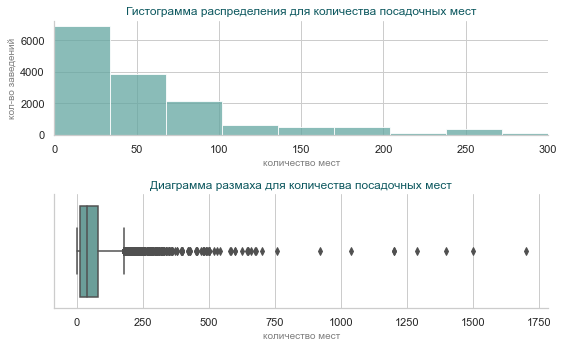

In [19]:
fig = plt.figure(figsize=(8, 5))

ax1 = fig.add_subplot(2,1,1) # положение графика внутри области для рисования
ax2 = fig.add_subplot(2,1,2)

sns.histplot(x='seating_num', data=df, bins=50, color='#63a6a0', ax=ax1) # построение гистограммы
sns.boxplot(x='seating_num', data=df, color='#63a6a0', ax=ax2) # построение диаграммы размаха

ax1.set_title('Гистограмма распределения для количества посадочных мест', color='#0d585f')
ax2.set_title('Диаграмма размаха для количества посадочных мест', color='#0d585f')

ax1.set_xlabel('количество мест', color='#808080', size=10)
ax1.set_ylabel('кол-во заведений', color='#808080', size=10)
ax2.set_xlabel('количество мест', color='#808080', size=10)

ax1.set_xlim(0, 300)

fig.tight_layout() # устранение наложения графиков

plt.show()

По результатам изучения данных в столбце видим, что медианное значение количества посадочных мест - 40 шт. Cреднее значение 60 мест не показательно, т.к. на него влияют слишком большие значения. Распределение имеет очень длинный правый "хвост": 75% значений выборки находятся до показателя в 80 посадочных мест, максимальное значение - 1700 мест. Также есть заведения, в которых посадочные места отсутствуют.

Посмотрим на список заведений с самым большим количеством мест:

In [20]:
df.loc[df['seating_num'] > 1250]

,id,object_name,chain,object_type,address,seating_num,object_name_1
8122,80291,Банкетный зал Шелк,несетевой,ресторан,"город Москва, Большой Саввинский переулок, дом 12, строение 10Г",1500,БАНКЕТНЫЙЗАЛШЕЛК
8319,27750,СТОЛОВАЯ-БУФЕТ,несетевой,столовая,"город Москва, улица Волхонка, дом 15",1400,СТОЛОВАЯБУФЕТ
9036,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,несетевой,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288,КОМБИНАТПИТАНИЯУПРАВЛЕНИЕАКАДЕМСЕРВИС
12675,199696,Arena by Soho Family,несетевой,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700,ARENABYSOHOFAMILY


Такие вместительные заведения действительно существуют: большие банкетные залы, концертные холлы, университетские столовые и т.д. Количество посадочных мест в этом случае является корректным.

Теперь выведем количество строк с нулями в количестве посадочных мест:

In [21]:
print(f"Всего заведений для анализа: {len(df)} шт.")
print(f"Заведений с нулевым кол-вом мест: {len(df.loc[df['seating_num'] == 0])} шт.")
print(f"Доля нулевых: {round(len(df.loc[df['seating_num'] == 0]) / len(df) * 100)} %")

Всего заведений для анализа: 15284 шт.
Заведений с нулевым кол-вом мест: 1589 шт.
Доля нулевых: 10 %


Доля заведений с нулевым количеством посадочных мест значительная, проверим их более детально: посмотрим разбивку по видам

In [22]:
df.loc[df['seating_num'] == 0].groupby('object_type') \
                              .agg({'id':'count'}) \
                              .sort_values(by='id', ascending=False) \
                              .rename(columns={'id': 'count'})

,count
object_type,
фастфуд,690
кафе,306
закусочная,182
кулинария,145
кафетерий,111
буфет,64
ресторан,44
бар,28
столовая,19


Объекты с нулевым количеством посадочных мест представлены абсолютно разными видами, лидером из которых являются фастфуды. Не исключены и ошибки в исходных данных, но скорее всего, большинство таких заведений работают на вынос. Делаем вывод, что и эти данные корректны.

### Промежуточный вывод по шагу

Данные загружены, проведена предобработка, проверка на корректность текстовых и числовых значений, дубликаты удалены, таблица готова к исследовательскому анализу.

## Исследовательский анализ данных

### Виды заведений общественного питания

Построим сводную таблицу, по которой будем исследовать соотношение видов объектов общественного питания по количеству:

In [23]:
# создание сводной таблицы
type_pivot = (
    df.groupby('object_type')
      .agg({'id': 'count'})
      .sort_values(by='id', ascending=False)
      .reset_index()
      .rename(columns={'id': 'count'})
)

# ввод столбца с долей значения в общем объеме
type_pivot['share'] = type_pivot['count'] / type_pivot['count'].sum()

type_pivot.style.format({'share': '{:.1%}'})

,object_type,count,share
0,кафе,6071,39.7%
1,столовая,2584,16.9%
2,ресторан,2282,14.9%
3,фастфуд,1898,12.4%
4,бар,855,5.6%
5,буфет,577,3.8%
6,кафетерий,395,2.6%
7,закусочная,349,2.3%
8,кулинария,273,1.8%


Визуализируем полученные данные:

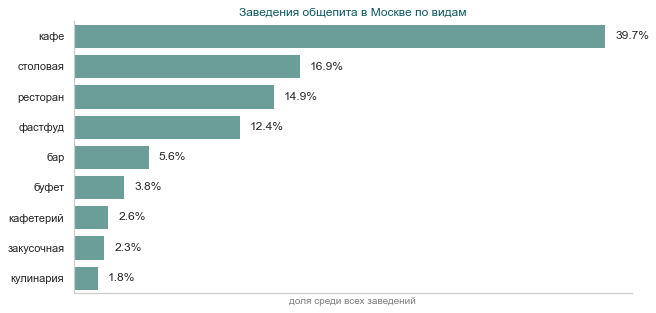

In [24]:
plt.figure(figsize=(10,5))

sns.barplot(
    y='object_type',
    x='share',
    data=type_pivot,
    orient='h',
    color='#63a6a0'
)

plt.xlabel('доля среди всех заведений', color='#808080', size=10)
plt.ylabel('')
plt.xticks([])
plt.title('Заведения общепита в Москве по видам', color='#0d585f')

for x,y in zip(type_pivot['share'], range(len(type_pivot))):
    label = '{:.1%}'.format(x)
    plt.annotate(label, # текст метки
                 (x,y), # координаты метки
                 textcoords="offset points", # позиция текста метки
                 xytext=(10,0), # расстояние между текстом и точкой координат метки
                 va='center') # выравнивание метки

plt.show()

**Вывод**

Наиболее распространенным видом объектов общественного питания в Москве являются кафе: их около 40% от общего числа объектов. Также в топе по количеству заведений находятся столовые, рестораны и фастфуды: от 12% до 17% от общего количества. Остальные виды заведений распространены намного меньше.

### Сетевые и несетевые заведения

Построим сводную таблицу, по которой будем исследовать соотношение сетевых и несетевых заведений по количеству:

In [25]:
# создание сводной таблицы
chain_pivot = (
    df.groupby('chain')
      .agg({'id': 'count'})
      .sort_values(by='id', ascending=False)
      .reset_index()
      .rename(columns={'id': 'count'})
)

# ввод столбца с долей значения в общем объеме
chain_pivot['share'] = chain_pivot['count'] / chain_pivot['count'].sum()

chain_pivot.style.format({'share': '{:.0%}'})

,chain,count,share
0,несетевой,12427,81%
1,сетевой,2857,19%


Визуализируем полученные данные:

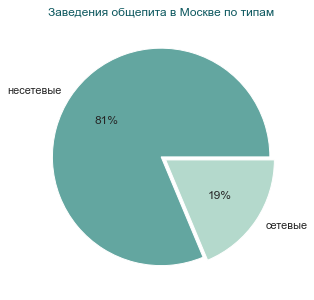

In [26]:
plt.figure(figsize=(15,5))

plt.pie(
    x=chain_pivot['count'],
    labels = ['несетевые', 'сетевые'],
    colors=('#63a6a0', '#b4d9cc'),
    autopct='%1.0f%%',
    explode=(0, 0.05)
)
plt.title('Заведения общепита в Москве по типам', color='#0d585f')

plt.show()

**Вывод**

Несетевых объектов в четыре раза больше, чем сетевых.

### Виды сетевых заведений

Построим сводную таблицу для сетевых заведений, отражающую виды объектов общественного питания:

In [27]:
# создание сводной таблицы
ch_t_pivot = (
    df.pivot_table(
          index = 'object_type',
          columns = 'chain',
          values = 'id',
          aggfunc = 'count'
    )
    .reset_index()
)

# добавление столбцов
ch_t_pivot.insert(1, 'total', ch_t_pivot['несетевой'] + ch_t_pivot['сетевой'])
ch_t_pivot.insert(4, 'chain_%', ch_t_pivot['сетевой'] / ch_t_pivot['total'])

# удаление столбца
ch_t_pivot = ch_t_pivot.drop(columns='несетевой')

# переименование столбцов
ch_t_pivot.columns = ['object_type', 'total', 'chain', 'chain_%']

#сортировка
ch_t_pivot = ch_t_pivot.sort_values(by='chain_%', ascending = False).reset_index(drop=True)

ch_t_pivot.style.format({'chain_%': '{:.1%}'})

,object_type,total,chain,chain_%
0,фастфуд,1898,772,40.7%
1,кулинария,273,74,27.1%
2,кафе,6071,1371,22.6%
3,ресторан,2282,490,21.5%
4,кафетерий,395,57,14.4%
5,закусочная,349,48,13.8%
6,бар,855,29,3.4%
7,буфет,577,12,2.1%
8,столовая,2584,4,0.2%


Перед созданием графика три последних вида с наименьшими долями сетевых заведений объединим в группу "прочие":

In [28]:
ch_t_pivot = ch_t_pivot[0:6].append(
    {
        'object_type':'прочие',
        'total': ch_t_pivot[6:9]['total'].sum(),
        'chain': ch_t_pivot[6:9]['chain'].sum(),
        'chain_%': ch_t_pivot[6:9]['chain'].sum() / ch_t_pivot[6:9]['total'].sum()
    },
    ignore_index=True)

ch_t_pivot.style.format({'chain_%': '{:.1%}'})

,object_type,total,chain,chain_%
0,фастфуд,1898,772,40.7%
1,кулинария,273,74,27.1%
2,кафе,6071,1371,22.6%
3,ресторан,2282,490,21.5%
4,кафетерий,395,57,14.4%
5,закусочная,349,48,13.8%
6,прочие,4016,45,1.1%


Визуализируем полученные данные:

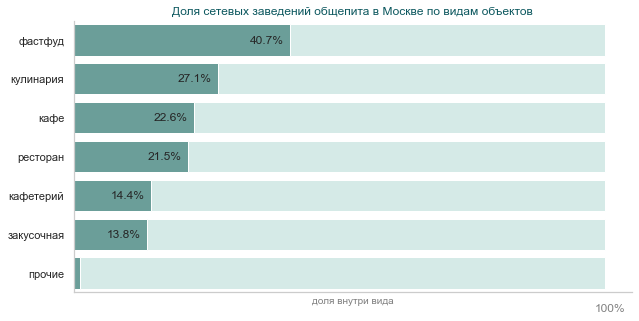

In [29]:
plt.figure(figsize=(10,5))

sns.barplot(y='object_type', x=[1]*7, data=ch_t_pivot, orient='h', color='#d1eeea')
sns.barplot(y='object_type', x='chain_%', data=ch_t_pivot, orient='h', color='#63a6a0')

plt.xlabel('доля внутри вида', color='#808080', size=10)
plt.ylabel('')
plt.xticks([])
plt.title('Доля сетевых заведений общепита в Москве по видам объектов', color='#0d585f')

for x,y in zip(ch_t_pivot['chain_%'][0:6], range(len(type_pivot)-3)):
    label = '{:.1%}'.format(x)
    plt.annotate(label, # текст метки
                 (x,y), # координаты метки
                 textcoords="offset points", # позиция текста метки
                 xytext=(-40,0), # расстояние между текстом и точкой координат метки
                 va='center') # выравнивание метки

plt.annotate('100%', (0.98,7), annotation_clip=False, color='#808080')

plt.show()

**Вывод**:

Сетевое распространение характерно преимущественно для объектов фастфуда.

### Характеристики сетевых заведений

Сгруппируем данные по "сетевикам" по наименованиям заведений, для каждого заведения посчитаем количество пунктов питания и медианное значение количества посадочных мест:

In [30]:
df_chain = (
    df.loc[(df['chain'] == 'сетевой')]
      .pivot_table(
          index='object_name_1',
          values=['id', 'seating_num'],
          aggfunc={'id': 'count', 'seating_num': 'median'}
        )
      .reset_index()
)

df_chain.columns = ['object_name_1', 'objects_num', 'seating_num_median']

df_chain.head()

,object_name_1,objects_num,seating_num_median
0,BOCCONCINO,3,68.0
1,BURGERCLUB,3,20.0
2,COFFEESHOPCOMPANY,4,50.0
3,COFIX,25,10.0
4,CORREAS,3,32.0


Далее для каждой сети определим сегмент в зависимости от количества заведений и медианного количества посадочных мест, чтобы в итоге получить четыре сегмента для характеристик сетевых объектов. Для определения границ сегментов возьмем медианные значения величин:

In [31]:
df_chain.describe()[4:7].style.format('{:.0f}')

,objects_num,seating_num_median
25%,2,20
50%,4,42
75%,8,82


In [32]:
# функция для определения сегмента
def segment(row):
    if (row['objects_num'] < df_chain['objects_num'].median()
        and row['seating_num_median'] < df_chain['seating_num_median'].median()
    ):
        segment = 'мало заведений, мало мест'
    elif (row['objects_num'] < df_chain['objects_num'].median()
          and row['seating_num_median'] >= df_chain['seating_num_median'].median()
    ):
        segment = 'мало заведений, много мест'
    elif (row['objects_num'] >= df_chain['objects_num'].median()
          and row['seating_num_median'] < df_chain['seating_num_median'].median()
    ):
        segment = 'много заведений, мало мест'
    else:
        segment = 'много заведений, много мест'
    
    return segment

# добавление сегментов в датафрейм
df_chain['segment'] = df_chain.apply(segment, axis=1)

df_chain.head()

,object_name_1,objects_num,seating_num_median,segment
0,BOCCONCINO,3,68.0,"мало заведений, много мест"
1,BURGERCLUB,3,20.0,"мало заведений, мало мест"
2,COFFEESHOPCOMPANY,4,50.0,"много заведений, много мест"
3,COFIX,25,10.0,"много заведений, мало мест"
4,CORREAS,3,32.0,"мало заведений, мало мест"


Покажем распределение сетевых заведений по четырем сегментам сначала в табличном виде:

In [33]:
df_chain_gr = (df_chain
                   .groupby('segment')
                   .agg({'object_name_1': 'count'})
                   .rename(columns={'object_name_1': 'objects_num'})
                   .sort_values(by='objects_num', ascending=False)
)

df_chain_gr['share'] = df_chain_gr['objects_num'] / df_chain_gr['objects_num'].sum()

df_chain_gr.style.format({'share': '{:.0%}'})

,objects_num,share
segment,,
"много заведений, мало мест",73,27%
"много заведений, много мест",70,25%
"мало заведений, много мест",69,25%
"мало заведений, мало мест",63,23%


Отразим распределение сетевых заведений по сегментам в виде диаграммы рассеяния:

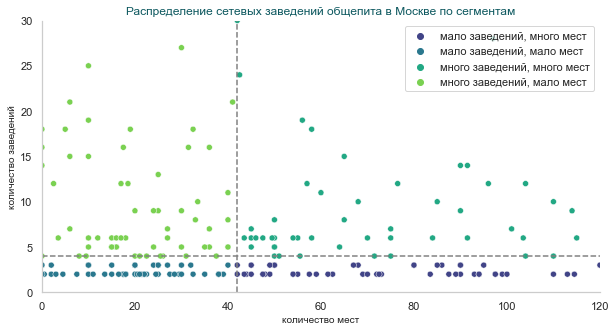

In [34]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='seating_num_median',
                y='objects_num',
                data=df_chain,
                hue='segment',
                palette='viridis'
)
plt.axvline(x=df_chain['seating_num_median'].median(), color='#808080', linestyle='--')
plt.axhline(y=df_chain['objects_num'].median(), color='#808080', linestyle='--')

plt.grid()

plt.xlabel('количество мест', size=10)
plt.ylabel('количество заведений', size=10)
plt.xlim(0, 120)
plt.ylim(0, 30)
plt.title('Распределение сетевых заведений общепита в Москве по сегментам', color='#0d585f')
plt.legend(loc='upper right')

plt.show()

**Вывод:**

Сетевых заведений с большим количеством точек питания и небольшой вместимостью 27% из общего числа - это максимальный показатель. Однако, явно лидирующего сегмента нет: сети примерно поровну разделились между всеми четырьмя сегментами. 

### Средняя вместимость по видам заведений

Построим сводную таблицу, по которой будем исследовать вместимость по видам объектов общественного питания. Исключим из рассмотрения заведения, работающие на вынос, а в качестве показателя вместимости выберем медианное количество посадочных мест.

In [35]:
# создание сводной таблицы
seating_pivot = (
    df.query('seating_num > 0')
      .groupby('object_type')
      .agg({'seating_num': 'median'})
      .sort_values(by='seating_num', ascending=False)
      .reset_index()
      .rename(columns={'seating_num': 'seating_num_med'})
)

seating_pivot.style.format({'seating_num_med': '{:.0f}'})

,object_type,seating_num_med
0,столовая,105
1,ресторан,80
2,буфет,40
3,бар,35
4,кафе,35
5,фастфуд,20
6,закусочная,10
7,кафетерий,9
8,кулинария,8


Визуализируем полученные результаты:

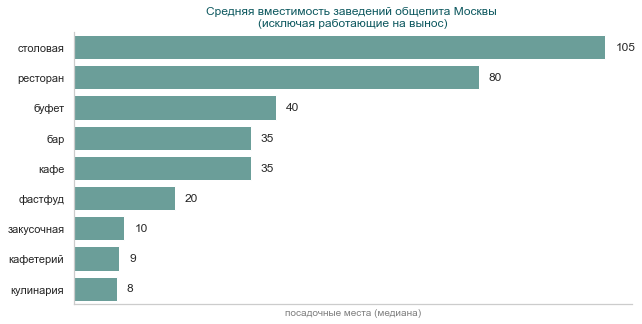

In [36]:
plt.figure(figsize=(10,5))

sns.barplot(y='object_type', x='seating_num_med', data=seating_pivot, orient='h', color='#63a6a0')

plt.xlabel('посадочные места (медиана)', color='#808080', size=10)
plt.ylabel('')
plt.xticks([])
plt.title('Средняя вместимость заведений общепита Москвы \n(исключая работающие на вынос)', color='#0d585f')

for x,y in zip(seating_pivot['seating_num_med'], range(len(seating_pivot))):
    label = '{:.0f}'.format(x)
    plt.annotate(label, # текст метки
                 (x,y), # координаты метки
                 textcoords="offset points", # позиция текста метки
                 xytext=(10,0), # расстояние между текстом и точкой координат метки
                 va='center') # выравнивание метки

plt.show()

**Вывод:**

В среднем, самыми вместительными из всех видов заведений являются столовые: посадочных мест в них 105 единиц (медианное количество). Самый распространенный вид заведений - кафе - обладает медианной вместимостью 35 посадочных мест.

### Топ-10 улиц Москвы по количеству заведений общественного питания

Для ответа на этот вопрос необходимо выделить данные о названии улицы из столбца `address`:

In [37]:
# список слов для поиска в адресе
words = ['улица','переулок','шоссе','проспект','площадь','проезд',
         'аллея','бульвар','набережная','тупик','линия']

# функция для выделения улицы/переулка/проспекта и т.д. из адреса
def find_street(address):
    for i in range(len(address.split(', '))):
        for j in words:
            if address.split(', ')[i].find(j) >= 0:
                return address.split(', ')[i]

# создаем новый столбец с названием улицы
df['street_name'] = df['address'].apply(find_street)

df.head()

,id,object_name,chain,object_type,address,seating_num,object_name_1,street_name
0,151635,СМЕТАНА,несетевой,кафе,"город Москва, улица Егора Абакумова, дом 9",48,СМЕТАНА,улица Егора Абакумова
1,77874,Родник,несетевой,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,РОДНИК,улица Талалихина
2,24309,Кафе «Академия»,несетевой,кафе,"город Москва, Абельмановская улица, дом 6",95,КАФЕАКАДЕМИЯ,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,сетевой,кафе,"город Москва, Абрамцевская улица, дом 1",40,ПИЦЦЕТОРИЯ,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,несетевой,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,КАФЕВИШНЕВАЯМЕТЕЛЬ,Абрамцевская улица


Предложенный способ выделения улицы из адреса даст пустые значения в тех случаях, когда улица не указана вообще. Пример таких адресов из нашего датасета: 'город Москва, город Зеленоград, корпус 436', 'город Москва, микрорайон Северное Чертаново, дом 1А'. Посмотрим, сколько будет пустых значений:

In [38]:
a = len(df.loc[df['street_name'].isna()]) / len(df) * 100

print(f"Не определено улиц для {round(a, 1)}% строк таблицы")

Не определено улиц для 2.6% строк таблицы


Видим, что механизм выделения улиц сработал достаточно хорошо.

Выведем топ-10 улиц Москвы по количеству объектов общественного питания:

In [39]:
# создание сводной таблицы
max_objects_streets = (
    df.groupby('street_name')
      .agg({'id': 'count'})
      .sort_values(by='id', ascending=False)
      .reset_index()
      .rename(columns={'id': 'objects_num'})
).head(10)

max_objects_streets

,street_name,objects_num
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,172
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


Визуализируем полученные результаты:

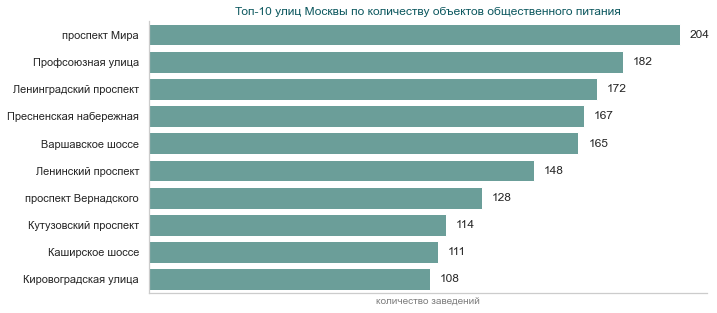

In [40]:
plt.figure(figsize=(10,5))

sns.barplot(y='street_name', x='objects_num', data=max_objects_streets, orient='h', color='#63a6a0')

plt.xlabel('количество заведений', color='#808080', size=10)
plt.ylabel('')
plt.xticks([])
plt.title('Топ-10 улиц Москвы по количеству объектов общественного питания', color='#0d585f')

for x,y in zip(max_objects_streets['objects_num'], range(len(max_objects_streets))):
    label = '{:.0f}'.format(x)
    plt.annotate(label, # текст метки
                 (x,y), # координаты метки
                 textcoords="offset points", # позиция текста метки
                 xytext=(10,0), # расстояние между текстом и точкой координат метки
                 va='center') # выравнивание метки

plt.show()

Все эти улицы - огромные транспортные артерии, соединяющие разные части города. Здесь расположены деловые центры,  культурные объекты, ТРЦ, выставки, музеи и т.д. По ним ежедневно перемещаются огромные потоки как жителей, так и туристов города, поэтому здесь сосредоточено большое число объектов общественного питания.

Для определения районов расположения улиц из топ-10 воспользуемся внешней информацией. Воспользуемся Порталом открытых данных Правительства Москвы и загрузим полную версию датасета ["Общественное питание в Москве"](https://data.mos.ru/opendata/7710881420-obshchestvennoe-pitanie-v-moskve).

*P.S. Чтобы не утяжелять тетрадку, удалила перед загрузкой лишние столбцы.*

In [41]:
# загрузка стороннего датасета

from io import BytesIO
import requests
spreadsheet_id = '1nbruX8r0BvK0bMCM_AGo3YCfv9gAv_PRlldhxIlRQoc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
r = requests.get(file_name)
df_full = pd.read_excel(BytesIO(r.content))
df_full.head()

,ID,Name,District,Address
0,151635,СМЕТАНА,Ярославский район,"город Москва, улица Егора Абакумова, дом 9"
1,77874,Родник,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1"
2,24309,Кафе «Академия»,Таганский район,"Российская Федерация, город Москва, внутригородская территория муниципальный округ Таганский, Абельмановская улица, дом 6"
3,27429,ГБОУ «Школа № 1430 имени Героя Социалистического Труда Г.В. Кисунько» Школа № 1051,район Лианозово,"город Москва, Угличская улица, дом 17"
4,148815,Брусника,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2"


Из этого датафрейма сформируем таблицу соответствия между адресами и районами города Моквы:

In [42]:
# создание справочника
directory = (
    df_full.groupby('Address')
           .agg({'District': 'first'})
           .reset_index()
)
directory.head()

,Address,District
0,"2-я Тверская-Ямская улица, дом 40/3, строение 1",Тверской район
1,"5-й Котельнический переулок, дом 11",Таганский район
2,"Алтуфьевское шоссе, дом 52А",Алтуфьевский район
3,"Большая Серпуховская улица, дом 48, строение 2",район Замоскворечье
4,"Вознесенский переулок, дом 7, строение 1",Пресненский район


Добавим в основную таблицу район, пользуясь справочником:

In [43]:
# соединение таблицы со справочником
df = df.merge(directory, left_on='address', right_on='Address', how='left')

# удаление лишнего столбца
df = df.drop(columns=['Address'])

# перевод наименований столбцов в нижний регистр
df.columns = df.columns.str.lower()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15283
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             15284 non-null  int64 
 1   object_name    15284 non-null  object
 2   chain          15284 non-null  object
 3   object_type    15284 non-null  object
 4   address        15284 non-null  object
 5   seating_num    15284 non-null  int64 
 6   object_name_1  15284 non-null  object
 7   street_name    14885 non-null  object
 8   district       12048 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


Видим, что районы подтянулись не ко всем адресам, но будем считать, что в целом для ответов на вопросы исследования этого будет достаточно.

Доработаем сводную таблицу по топ-10 улиц: введем в нее названия районов:

In [44]:
# ввод столбца с маркером True/False для улиц из списка топ-10
df['is_top_streets'] = df['street_name'].isin(max_objects_streets['street_name'])

# таблица соответствия улиц из топ-10 и списка районов
top_streets_districts = (
    df.loc[(df['is_top_streets'] == True) & ~(df['district'].isna())]
      .groupby('street_name')
      .agg({'district': 'unique'})
      .reset_index()
)

# добавление списка районов в итоговую таблицу
max_objects_streets = (
    max_objects_streets.merge(top_streets_districts, on='street_name')
)

max_objects_streets

,street_name,objects_num,district
0,проспект Мира,204,"[Мещанский район, Останкинский район, Алексеевский район, район Ростокино, район Свиблово]"
1,Профсоюзная улица,182,"[Академический район, район Черёмушки, район Тёплый Стан, район Коньково, Обручевский район, район Ясенево]"
2,Ленинградский проспект,172,"[район Беговой, район Аэропорт, район Сокол, Хорошёвский район]"
3,Пресненская набережная,167,[Пресненский район]
4,Варшавское шоссе,165,"[Донской район, Нагорный район, район Чертаново Южное, район Чертаново Центральное, район Чертаново Северное, район Нагатино-Садовники, район Южное Бутово, поселение Воскресенское, поселение Щербинка]"
5,Ленинский проспект,148,"[район Якиманка, Донской район, Гагаринский район, Ломоносовский район, Обручевский район, район Тропарёво-Никулино, район Тёплый Стан, район Проспект Вернадского]"
6,проспект Вернадского,128,"[Ломоносовский район, район Тропарёво-Никулино, район Проспект Вернадского, поселение Вороновское, район Раменки]"
7,Кутузовский проспект,114,"[район Дорогомилово, район Фили-Давыдково, поселение Краснопахорское]"
8,Каширское шоссе,111,"[район Москворечье-Сабурово, район Орехово-Борисово Северное, район Нагатино-Садовники, район Орехово-Борисово Южное]"
9,Кировоградская улица,108,"[район Чертаново Центральное, район Чертаново Южное, район Чертаново Северное]"


Если в виде таблиц данные использовать в дальнейшем будет не очень удобно, то можно предусмотреть вывод названий улиц из топ-10 и районов, к которым они относятся, в виде списков:

In [45]:
# вывод списка топ-10 улиц по количеству заведений
print('Топ-10 улиц Москвы по количеству заведений общественного питания:')
print(list(max_objects_streets['street_name']))
print('')

# вывод списка районов для улиц из топ-10
a = df.loc[(df['is_top_streets'] == True) & ~(df['district'].isna())]['district'].unique()
print('Улицы из топ-10 по количеству заведений относятся к следующим районам:')
print(list(a))
print('')

# подсчет количества районов для улиц из топ-10
print(f'Всего районов в списке: {len(a)}')

Топ-10 улиц Москвы по количеству заведений общественного питания:
['проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект', 'Пресненская набережная', 'Варшавское шоссе', 'Ленинский проспект', 'проспект Вернадского', 'Кутузовский проспект', 'Каширское шоссе', 'Кировоградская улица']

Улицы из топ-10 по количеству заведений относятся к следующим районам:
['Донской район', 'Нагорный район', 'район Чертаново Южное', 'Ломоносовский район', 'район Тропарёво-Никулино', 'район Москворечье-Сабурово', 'район Чертаново Центральное', 'район Дорогомилово', 'район Беговой', 'район Аэропорт', 'район Якиманка', 'Гагаринский район', 'Обручевский район', 'Мещанский район', 'Останкинский район', 'Алексеевский район', 'Академический район', 'район Черёмушки', 'район Тёплый Стан', 'район Сокол', 'район Коньково', 'район Чертаново Северное', 'район Проспект Вернадского', 'Хорошёвский район', 'район Орехово-Борисово Северное', 'район Нагатино-Садовники', 'район Ростокино', 'район Фили-Давыдково', 'пос

**Вывод:**

Определены топ-10 улиц Москвы по количеству расположенных на них объектов общественного питания: тройку улиц-лидеров занимают проспект Мира, Профсоюзная улица и Ленинградский проспект. Также определены 38 районов города, в которых находятся заведения из списка топ-10 улиц (всего в Москве 125 районов и 21 поселение).

### Улицы с одним объектом общественного питания

Теперь найдем количество улиц, на которых, напротив, расположено всего одно заведение общественного питания:

In [46]:
# создание сводной таблицы
one_object_streets = (
    df.groupby('street_name')
      .agg({'id': 'count'})
      .reset_index()
      .rename(columns={'id': 'objects_num'})
).query('objects_num == 1')

print(f'По одному объекту питания расположено на {len(one_object_streets)} улицах.')

По одному объекту питания расположено на 549 улицах.


Выведем список районов для улиц с одним объектом общепита:

In [47]:
# ввод столбца с маркером True/False для улиц из списка улиц с одним объектом
df['is_one_object_streets'] = df['street_name'].isin(one_object_streets['street_name'])

b = df.loc[(df['is_one_object_streets'] == True) & ~(df['district'].isna())]['district'].unique()

#вывод списка районов для улиц c одним объектом питания
print('Улицы с одним заведением общественного питания относятся к следующим районам:')
print(list(b))
print('')

# подсчет количества районов для улиц c одним объектом питания
print(f'Всего районов в списке: {len(b)}')

Улицы с одним заведением общественного питания относятся к следующим районам:
['район Арбат', 'район Аэропорт', 'район Хорошёво-Мнёвники', 'район Беговой', 'район Хамовники', 'район Марьина Роща', 'Можайский район', 'район Богородское', 'район Преображенское', 'район Дорогомилово', 'район Сокольники', 'район Соколиная Гора', 'район Кунцево', 'район Лефортово', 'Донской район', 'район Котловка', 'Мещанский район', 'район Замоскворечье', 'район Фили-Давыдково', 'Басманный район', 'Нижегородский район', 'район Раменки', 'район Свиблово', 'Таганский район', 'район Ростокино', 'Красносельский район', 'район Южное Бутово', 'район Якиманка', 'Тверской район', 'Рязанский район', 'район Покровское-Стрешнево', 'поселение Десеновское', 'поселение Кленовское', 'Головинский район', 'Лосиноостровский район', 'Останкинский район', 'Пресненский район', 'район Косино-Ухтомский', 'Бутырский район', 'район Метрогородок', 'район Щукино', 'район Чертаново Южное', 'район Ясенево', 'район Зюзино', 'Алтуфьевс

Покажем, в каких топ-10 районах находится наибольшее количество улиц с одним заведением общественного питания:

In [48]:
# создание сводной таблицы
one_object_streets_districts = (
    df.loc[(df['is_one_object_streets'] == True) & ~(df['district'].isna())]
      .groupby('district')
      .agg({'id': 'count'})
      .rename(columns={'id': 'one_object_streets_num'})
      .sort_values(by='one_object_streets_num', ascending=False)
      .reset_index()
).head(10)

one_object_streets_districts

,district,one_object_streets_num
0,Таганский район,19
1,Басманный район,17
2,Пресненский район,16
3,Тверской район,15
4,район Хамовники,15
5,район Южное Бутово,9
6,Мещанский район,8
7,район Арбат,8
8,Красносельский район,8
9,Можайский район,8


<a id='intro2'></a>
Визуализируем полученные данные:

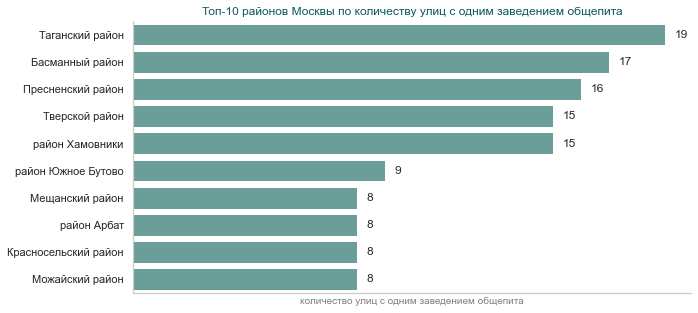

In [49]:
plt.figure(figsize=(10,5))

sns.barplot(y='district',
            x='one_object_streets_num',
            data=one_object_streets_districts,
            orient='h', color='#63a6a0')

plt.xlabel('количество улиц с одним заведением общепита', color='#808080', size=10)
plt.ylabel('')
plt.xticks([])
plt.title('Топ-10 районов Москвы по количеству улиц с одним заведением общепита', color='#0d585f')

for x,y in zip(one_object_streets_districts['one_object_streets_num'],
               range(len(one_object_streets_districts))):
    label = '{:.0f}'.format(x)
    plt.annotate(label, # текст метки
                 (x,y), # координаты метки
                 textcoords="offset points", # позиция текста метки
                 xytext=(10,0), # расстояние между текстом и точкой координат метки
                 va='center') # выравнивание метки

plt.show()

В этот список попадают небольшие улицы (переулки, проезды, тупики и т.д.), которые не расположены в местах с большой проходимостью. Это могут быть, например, улицы, на которых находятся учебные заведения: один объект - столовая учебного заведения.

**Вывод:**

Определены 549 улиц, на которых расположено всего по одному объекту общественного питания, а также 98 районов Москвы, в которых находятся эти улицы (всего в Москве 125 районов и 21 поселение). Сформирован список топ-10 районов, в которых расположено максимальное число улиц с одним заведением.

### Промежуточный вывод по шагу

Ответы на основные вопросы исследования подготовлены, можно переходить к формулированию общих выводов и подготовке рекомендаций для инвесторов.

## Общий вывод

Анализ рынка заведений общественного питания Москвы позволяет сделать следующие выводы:
* самым распространенным видом заведений являются "кафе": их 40% от общего числа заведений;
* несетевых объектов общепита в Москве в 4 раза больше, чем сетевых;
* сетевое распространение наиболее характерно для заведений вида "фастфуд": 41% заведений этого вида являются сетевыми;
* для сетевых заведений, в среднем, более характерно наличие большого количества объектов общепита с небольшой вместимостью:  от 4 заведений с числом мест до 40. При этом на рынке Москвы примерно в одинаковых долях присутствуют сети из разных вариантов "много/мало заведений и много/мало мест";
* без учета заведений, работающих на вынос, самый распространенный вид заведений - кафе - характеризуется медианной вместимостью 35 посадочных мест. Самыми вместительными из всех видов заведений являются столовые: посадочных мест в них 105 единиц;
* найдены топ-10 улиц с наибольшим количеством заведений общепита. Они расположены в 38 районах Москвы внутри МКАД, список улиц и районов доступен [здесь](#intro1);
* на 549 улицах Москвы, находящихся в 98 районах, расположено всего по одному объекту общественного питания. Сформирован список топ-10 районов, в которых находится максимальное число улиц с одним заведением, он доступен [здесь](#intro2).

С учетом этих выводов можно дать следующие рекомендации:
* формат нового заведения - "небольшое кафе" - вписывается в самую популярную нишу заведений общепита Москвы;
* с ориентацией на рынок можно рекомендовать количество посадочных мест в новом кафе 30-40 единиц;
* для размещения нового кафе рекомендуется осуществлять поиск свободного помещения в тех районах топовых улиц, в которых располагаются крупные торгово-развлекательные центры, музеи, выставки и другие объекты, привлекающие как туристов, так и жителей города. Такая рекомендация сформирована исходя из предположения о том, что размещая оригинальное кафе в близости к деловым центрам обычно рассчитывают на формирование постоянной клиентской базы, но формат заведения может оказаться привлекателен лишь в краткосрочной перспективе, и необходимо будет работать над дополнительными конкурентными преимуществами. Поэтому логичнее выбрать место, где не просто всегда много людей, а много людей, которые приходят отдыхать и развлекаться; 
* если формат нового заведения окажется востребованным в долгосрочной перспективе, то можно рассмотреть вопрос о создании сети: анализ показывает, что практически одинаково распространены как сети из 2-3 заведений, так и более крупные, при этом число посадочных мест также может быть совершенно разным. Если станет понятно, что у клиентов быстро теряется интерес к предлагаемому формату обслуживания, то можно будет отказаться от развития сети, при этом выбранное изначально выгодное местоположение не оставит заведение без клиентопотока.